##Build a model to recognize disease in Peach


**1.Load the data from gdrive to colab and unzip it**

**2.Become one with data(Data Preprocessing)**

**3.Build a VGG-16 model that we done before on Apple disease prediction tensorflow nn model**

**4.Train the model on the Peach image dataset and choose the better model**

**4.Evaluate and Visualize the predictions**

---


**Step1.**
Load the Peach plant disease data from google drive and unzip the file

---

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from zipfile import ZipFile
zip_ref=ZipFile('/gdrive/MyDrive/Peac.zip')
zip_ref.extractall()
zip_ref.close()

**Step2.** Become one with data and preprocess the *Peach* image dataset

---

In [3]:
import os
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

*Get the number of directories and images on the peach folder*


In [4]:
for directory_path,directory_name,file_names in os.walk("Peac"):
  print(f"There are {len(directory_name)} directories and {len(file_names)} images are in :{directory_path}")

There are 2 directories and 1 images are in :Peac
There are 2 directories and 0 images are in :Peac/valid
There are 0 directories and 459 images are in :Peac/valid/Peach___Bacterial_spot
There are 0 directories and 432 images are in :Peac/valid/Peach___healthy
There are 2 directories and 0 images are in :Peac/train
There are 0 directories and 1838 images are in :Peac/train/Peach___Bacterial_spot
There are 0 directories and 1728 images are in :Peac/train/Peach___healthy


Visualize some random images from selected folder


In [5]:
def visualize_image(path,disease):
  if(disease!='.DS_Store'):
    rand_img=np.random.choice(os.listdir(os.path.join(path,disease)))
    image=mpimg.imread(os.path.join(path,disease,rand_img))
    plt.figure(figsize=(8,6))
    plt.imshow(image)
    print(image.shape)
    plt.gca().invert_yaxis()
    plt.title(disease,fontsize=15,color="blue")

(256, 256, 3)


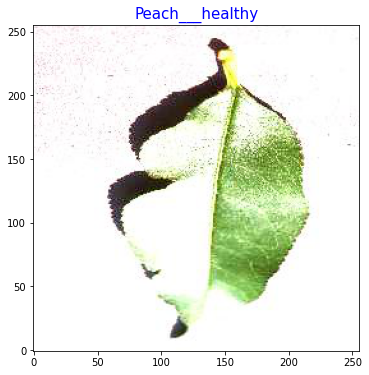

In [6]:
Random_image=np.random.choice(os.listdir("Peac/train/"))
visualize_image("Peac/train/",Random_image) 

**First train the VGG-16 architecture model with non-augmented data and check the performance**

In [7]:
#Normalize the data using ImageDataGeneator
traindata_gen=ImageDataGenerator(rescale=1/255.)
valdata_gen=ImageDataGenerator(rescale=1/255.)

In [8]:
''' 
Mapping our training and validation data to the ImageDataGenerator instance and using the function flow_from_directory
we define our taret_size,class_mode and batch_size
'''

traindata=traindata_gen.flow_from_directory("Peac/train",
                                            target_size=(256,256),
                                            class_mode="binary",
                                            batch_size=32)
validdata=valdata_gen.flow_from_directory("Peac/valid",
                                         target_size=(256,256),
                                         class_mode="binary",
                                         batch_size=32)

Found 3566 images belonging to 2 classes.
Found 891 images belonging to 2 classes.


**Step3.**


Use VGG-16 architecture to build the model

In [9]:
'''The above VGG-16 model is a pretty complex model that can genaralize 1000 classes 
but we have only 4 classes(labels) on out Apple disease data
'''

model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=(256,256,3),activation="relu"),
    tf.keras.layers.Conv2D(32,3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation="relu",strides=2),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])
history=model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [10]:
#define early stopping
early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)

model2.fit(traindata, steps_per_epoch=len(traindata),epochs=20,
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
112/112 [==============================] - 24s 115ms/step - loss: 0.3669 - accuracy: 0.8247 - val_loss: 0.1223 - val_accuracy: 0.9630
Epoch 2/20
112/112 [==============================] - 13s 118ms/step - loss: 0.1239 - accuracy: 0.9568 - val_loss: 0.0813 - val_accuracy: 0.9742
Epoch 3/20
112/112 [==============================] - 12s 108ms/step - loss: 0.0893 - accuracy: 0.9661 - val_loss: 0.0724 - val_accuracy: 0.9809
Epoch 4/20
112/112 [==============================] - 13s 115ms/step - loss: 0.0878 - accuracy: 0.9711 - val_loss: 0.0678 - val_accuracy: 0.9764
Epoch 5/20
112/112 [==============================] - 12s 105ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.0510 - val_accuracy: 0.9832
Epoch 6/20
112/112 [==============================] - 12s 106ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0576 - val_accuracy: 0.9787
Epoch 7/20
112/112 [==============================] - 12s 106ms/step - loss: 0.0471 - accuracy: 0.9826 - val_loss: 0.0375 - val_ac

In [11]:
def plot_loss_accuracy_curves(model):
  plt.figure()
  plt.plot(model.history.history['loss'],'r')
  plt.plot(model.history.history['val_loss'],'b')
  plt.title("loss curves",fontsize=14)
  # plt.axis(False);
  plt.figure()
  plt.plot(model.history.history['accuracy'],'r')
  plt.plot(model.history.history['val_accuracy'],'b')
  plt.title("accuracy",fontsize=14)

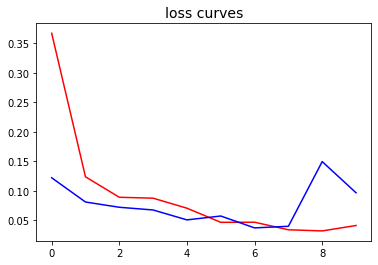

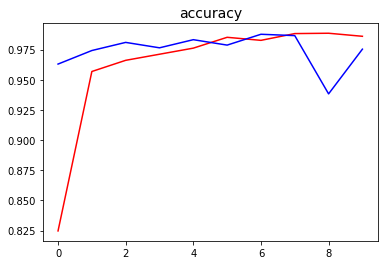

In [12]:
plot_loss_accuracy_curves(model2)

In [13]:
#Evaluate our model
model2.evaluate(validdata)

28/28 [==============================] - 2s 78ms/step - loss: 0.0969 - accuracy: 0.9753


[0.09690746665000916, 0.9753086566925049]

**Observation:**
Model2 performs well with non-augmented data.Let's try it on augmented data and check the performance

Step4. Create a model and name it model3 which'll be trained using augmented training data



In [14]:
traindata_aug_gen=ImageDataGenerator(rescale=1/255.,
                                    rotation_range=20,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True
                                     )

In [16]:
train_aug_data=traindata_aug_gen.flow_from_directory('Peac/train',
                                                     target_size=(256,256),
                                                     class_mode="binary",
                                                     batch_size=32)

Found 3566 images belonging to 2 classes.


In [17]:
model3=tf.keras.models.clone_model(model2)
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(train_aug_data,epochs=20,steps_per_epoch=len(train_aug_data),
           validation_data=validdata,
           validation_steps=len(validdata),callbacks=[early_stop])

Epoch 1/20
112/112 [==============================] - 60s 533ms/step - loss: 0.3637 - accuracy: 0.8015 - val_loss: 0.1531 - val_accuracy: 0.9562
Epoch 2/20
112/112 [==============================] - 56s 501ms/step - loss: 0.1021 - accuracy: 0.9607 - val_loss: 0.1153 - val_accuracy: 0.9585
Epoch 3/20
112/112 [==============================] - 56s 499ms/step - loss: 0.1083 - accuracy: 0.9621 - val_loss: 0.0894 - val_accuracy: 0.9708
Epoch 4/20
112/112 [==============================] - 57s 512ms/step - loss: 0.0969 - accuracy: 0.9678 - val_loss: 0.1008 - val_accuracy: 0.9618
Epoch 5/20
112/112 [==============================] - 57s 505ms/step - loss: 0.0656 - accuracy: 0.9776 - val_loss: 0.0285 - val_accuracy: 0.9921
Epoch 6/20
112/112 [==============================] - 57s 506ms/step - loss: 0.0834 - accuracy: 0.9686 - val_loss: 0.0310 - val_accuracy: 0.9944
Epoch 7/20
112/112 [==============================] - 57s 507ms/step - loss: 0.0703 - accuracy: 0.9759 - val_loss: 0.0463 - val_ac

In [18]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                    

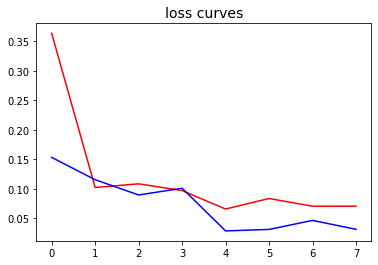

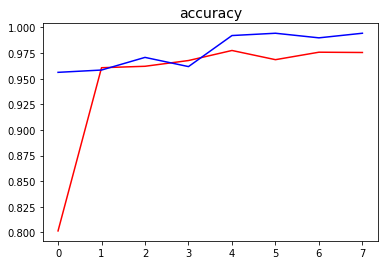

In [19]:
plot_loss_accuracy_curves(model3)

Evaluation of validation data on `model3`

In [20]:
model3.evaluate(validdata)

28/28 [==============================] - 2s 76ms/step - loss: 0.0312 - accuracy: 0.9944


[0.031193507835268974, 0.9943883419036865]

Evaluation of validation data on `model2`

In [21]:
model2.evaluate(validdata)

28/28 [==============================] - 2s 76ms/step - loss: 0.0969 - accuracy: 0.9753


[0.09690748155117035, 0.9753086566925049]

In [22]:
model2.save("model2_Peach.h5")
model3.save("model3_Peach.h5")

**Observation:**

As per the above observation `model3` and `model2` both  performs well on validation data.

where `model3` gave an accuracy: 99.3%

where `model2` gave an accuracy: 99.4%

Save the models and copy it to gdrive

In [23]:
shutil.copy("model2_Peach.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model2_Peach.h5'

In [24]:
shutil.copy("model3_Peach.h5",'/gdrive/MyDrive')

'/gdrive/MyDrive/model3_Peach.h5'

In [25]:
def load_and_prep_data(path):
  img=tf.io.read_file(path)
  #decode the image into tensor
  tensor=tf.io.decode_image(img,channels=3)

  image=tf.image.resize(tensor,[256,256])
  #normalize the image
  image=image/255.

  #we need to expand the first axis beacuse of batch size
  image=tf.expand_dims(image,axis=0)
  #(1,256,256,3) 

  return image

In [26]:
class_keys=list(traindata.class_indices.keys())

In [27]:
def visualize_random_class(model):
  plt.figure(figsize=(6,5))
  class_name=np.random.choice(os.listdir("Peac/valid"))
  image_name=np.random.choice(os.listdir(os.path.join("Peac/valid",class_name)))
  img=load_and_prep_data(os.path.join("Peac/valid",class_name,image_name))
  pred=model.predict(img)
  plt.imshow(tf.squeeze(img))
  index=round(pred[0][0])
  confidence=pred[0][0]
  if(index==0):confidence=1-pred[0][0]
  color="red"
  index=int(index)
  if(class_name == class_keys[index]):color="green"
  plt.title(class_keys[index]+f"\n\n Confidence: {confidence*100:.2f}%",color=color,fontsize=13)

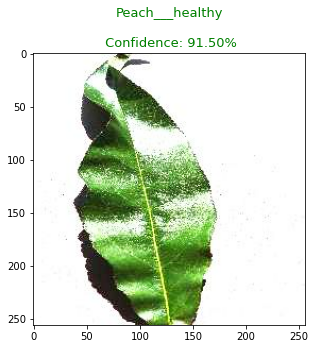

In [49]:
visualize_random_class(model3)

Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
def confusion_matrix_model(model):
  plt.figure(figsize=(5,5))
  y_test=[]
  y_pred=[]
  for i in range(1000):
    class_fol=np.random.choice(os.listdir('Peac/valid'))
    y_test.append(class_fol)
    image_name=np.random.choice(os.listdir(os.path.join('Peac/valid',class_fol)))
    pro_image=load_and_prep_data(os.path.join("Peac/valid",class_fol,image_name))
    pred=model.predict(pro_image)
    index=round(pred[0][0])
    y_pred.append(class_keys[index])
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap=plt.cm.Blues,cbar=False,annot_kws={"size": 16})
  plt.xticks(labels=class_keys,ticks=range(0,len(class_keys)),rotation=90)
  plt.yticks(labels=class_keys,ticks=range(0,len(class_keys)),rotation=360)
  plt.title("Confusion Matrix",fontsize=18,color="darkblue")

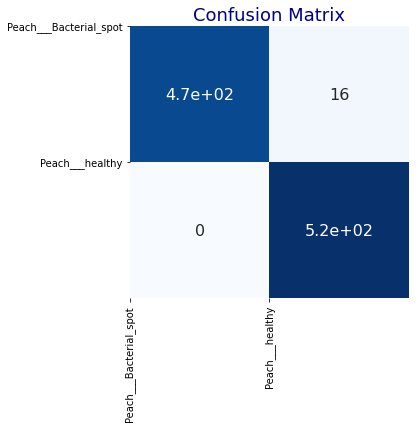

In [66]:
confusion_matrix_model(model2)

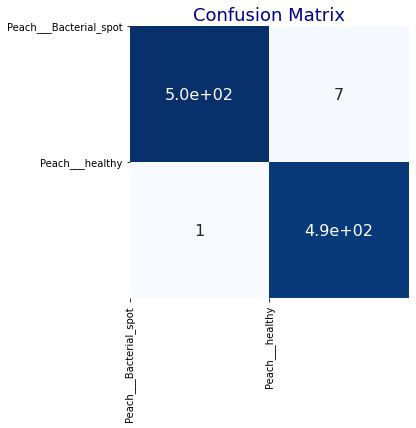

In [67]:
confusion_matrix_model(model3)

In [68]:
#model3 performs well